# 绘制各类别准确率评估指标柱状图

## 设置Matplotlib中文字体

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import os
fater_path = os.path.abspath('..')
print(fater_path)
os.chdir(fater_path)

/home/mark/Documents/PythonProject/ShuffleNet-Retrain/ShuffleNetV2+


In [6]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [7]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [8]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

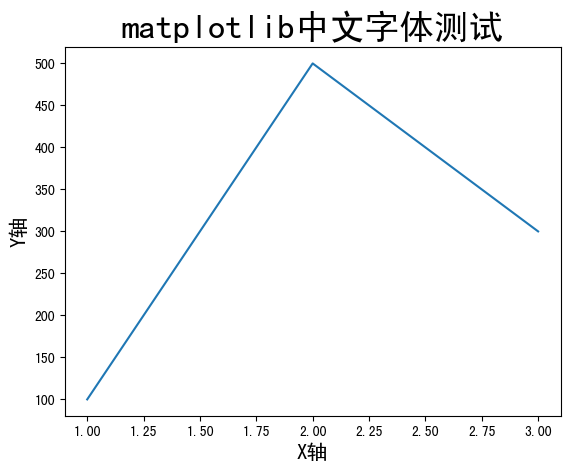

In [9]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

## 导入工具包

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataset_name = 'test_easy_classes'
model_path = './models/2023-12-14-17:59_max_epoch_100-afterSOD/'
model_name = 'retrain_COME15K_checkpoint-best-avg-0.544-Medium.pth.tar'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
dataset_name = 'test_hard_classes'
model_path = './models/2023-12-14-17:59_max_epoch_100-afterSOD/'
model_name = 'retrain_COME15K_checkpoint-best-avg-0.544-Medium.pth.tar'

# 类别名称 和 ID索引号 的映射字典
class_names_dic = {0: 'covering', 1: 'device', 2: 'domestic_animal', 3: 'mater', 4: 'person', 5: 'plant',
                       6: 'structure', 7: 'vertebrate'}
# 获得类别名称
classes = list(class_names_dic.values())
print(classes)

['covering', 'device', 'domestic_animal', 'mater', 'person', 'plant', 'structure', 'vertebrate']


## 导入各类别准确率评估指标表格

In [17]:
df = pd.read_csv(model_path + dataset_name + '-各类别准确率评估指标.csv')

In [18]:
df

,类别,precision,recall,f1-score,support,accuracy,AP,AUC
0,covering,0.000000,0.000000,0.000000,229.0,0.000000,0.218342,0.754407
1,device,0.591837,0.227006,0.328147,511.0,0.227006,0.432488,0.745061
2,domestic_animal,0.575851,0.699248,0.631579,266.0,0.699248,0.664385,0.939731
3,mater,0.449203,0.770940,0.567653,585.0,0.770940,0.565858,0.855729
4,person,0.576792,0.852459,0.688041,793.0,0.852459,0.740349,0.888886
5,plant,0.548387,0.369565,0.441558,184.0,0.369565,0.489737,0.891754
6,structure,0.444444,0.058394,0.103226,137.0,0.058394,0.206303,0.823487
7,vertebrate,0.533742,0.294915,0.379913,295.0,0.294915,0.452303,0.860904
8,macro avg,0.465032,0.409066,0.392515,3000.0,0.409066,0.471221,0.844995
9,weighted avg,0.498344,0.530667,0.473613,3000.0,0.530667,0.539219,0.846603


## 选择评估指标

In [19]:
feature = 'precision'
# feature = 'recall'
# feature = 'f1-score'
# feature = 'accuracy'
# feature = 'AP'
# feature = 'AUC'

## 绘制柱状图 easy

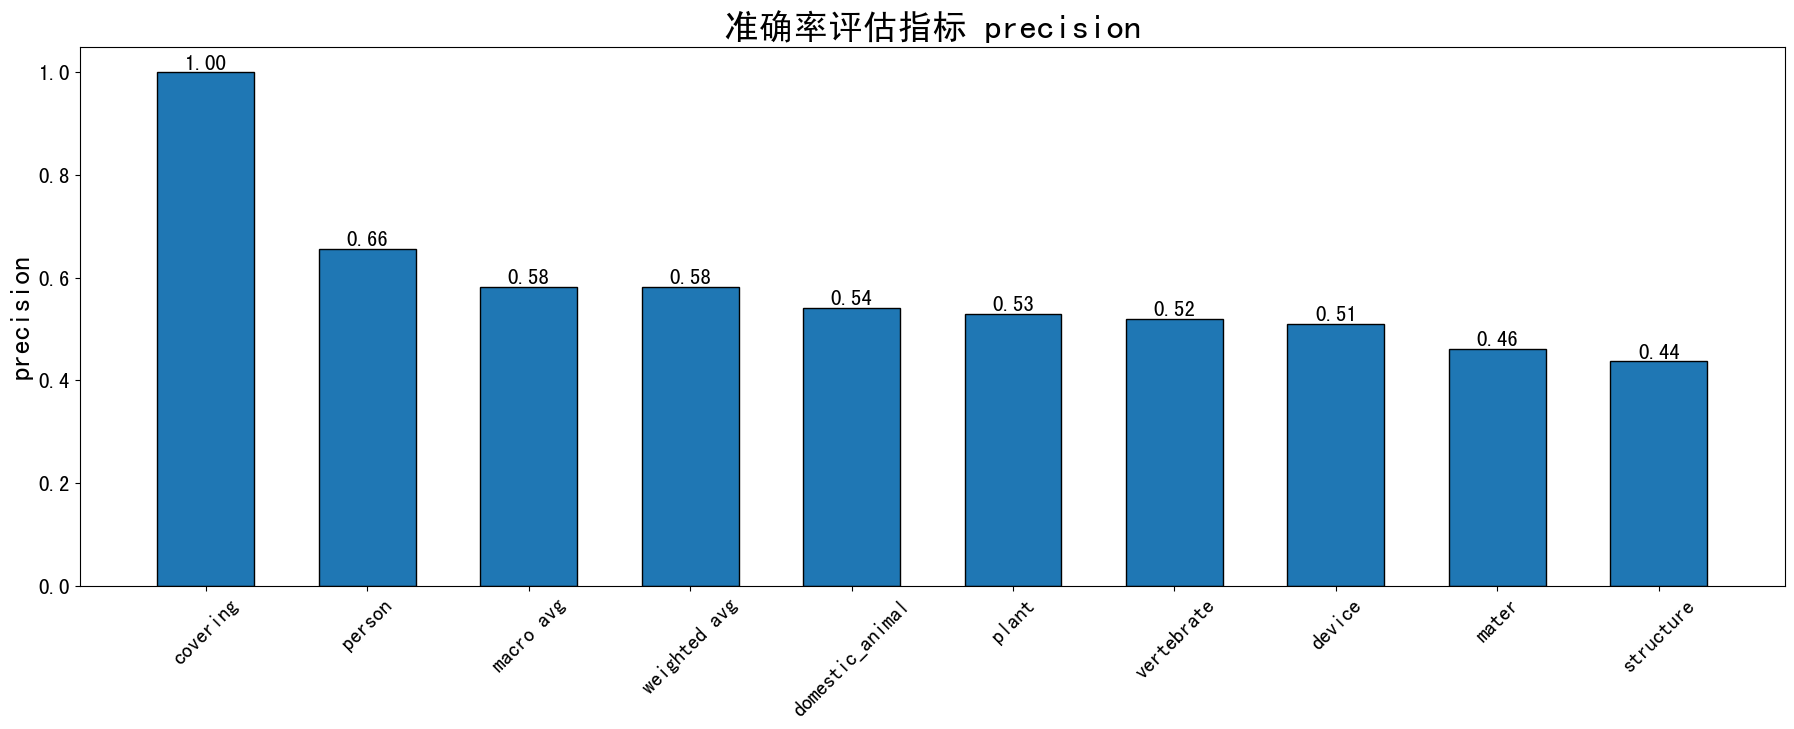

In [15]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig(model_path + dataset_name + '-各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()

## 绘制柱状图 hard

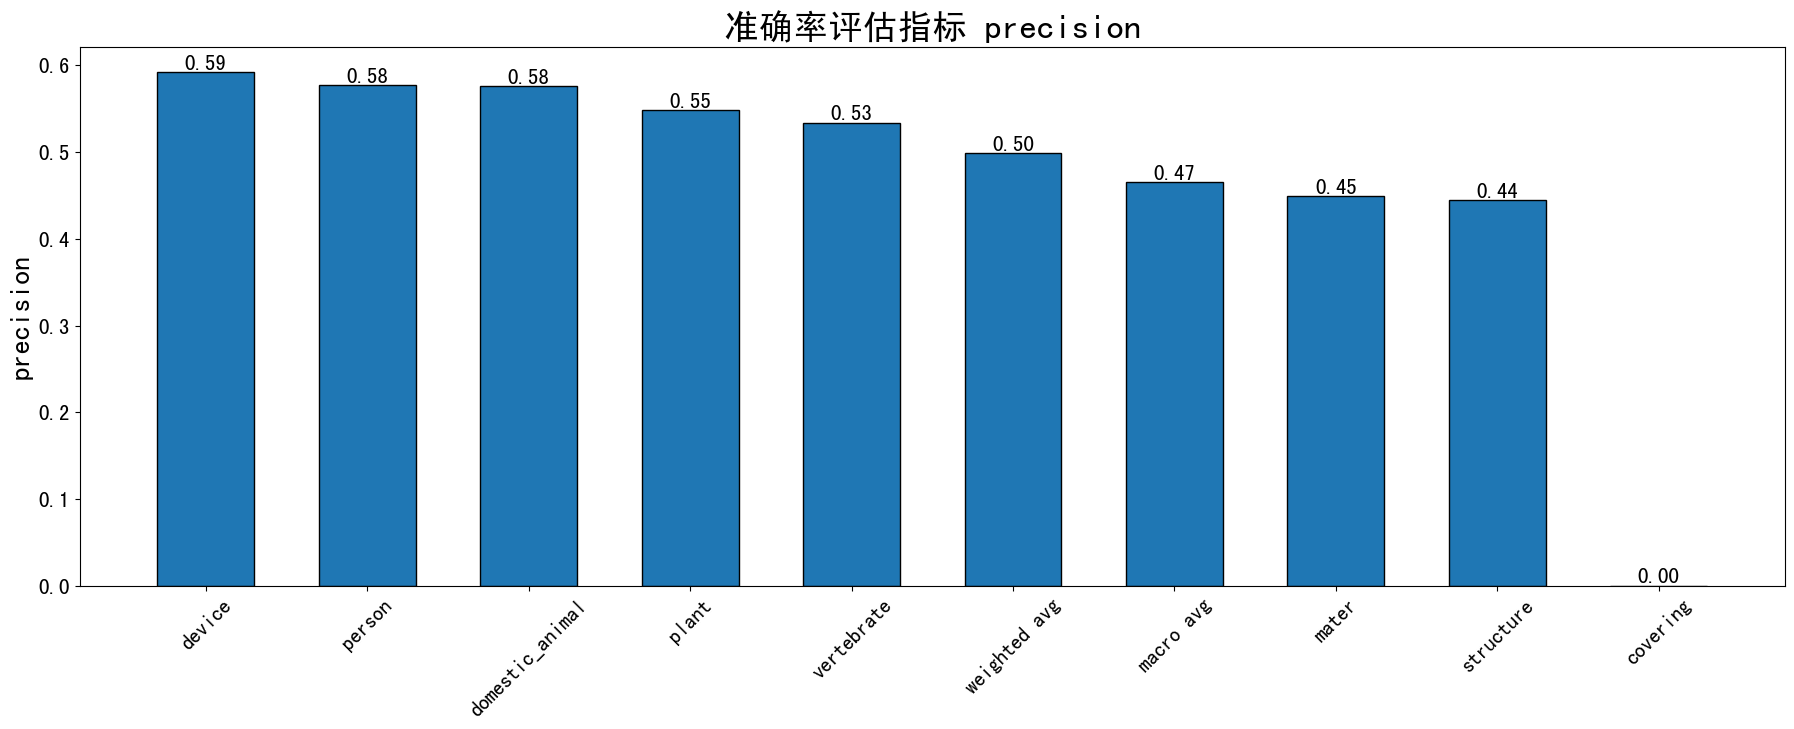

In [20]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig(model_path + dataset_name + '-各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()